### aim: 

### date: 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [5]:
####
startyr = 1955
endyr = 1960
varUKESM = 'somxl010'
varTOM = 'somxl030'

scenUKESM = '1A'
nameUKESM = f'UKESM_{scenUKESM}'

nameTOM = 'TOM12_TJ_1ASA'
baseDirTOM = f'/gpfs/data/greenocean/software/runs/{nameTOM}/'


### define scenarios
scendict = {
    # Baynes Sound
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}

#### get lists of scenarios
def make_yearlist_tom(yrst, yrend, dtype, baseDir = '/gpfs/data/greenocean/software/runs/TOM12_TJ_1ASA'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}//ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

def make_yearlist_ukesm(yrst, yren, tscen, dtype = 'grid-T'):
    print(f'SCENARIO {tscen}')
    dslist = []

    for y in range(yrst,yren):
        if ((y<1990) & ((tscen == '3A') | (tscen == '3B'))):
            tstr = scendict['1A']['hist_str']
        elif y<2015:
            tstr = scendict[tscen]['hist_str']

        else:
            tstr = scendict[tscen]['fut_str']

        try:
            td = glob.glob(f'/gpfs/data/greenocean/software/resources/MEDUSA/PROC2/*{tstr}*{y}*{dtype}*')
            dslist.append(td[0])
        except:
            pass
            #print(f'FAIL {tscen},{tstr}, {y}')
    return dslist


### 
time1 = time.time()
#ukesm = xr.open_mfdataset(make_yearlist_ukesm(startyr,endyr,'1A', dtype = 'MLD'))
tom = xr.open_mfdataset(make_yearlist_tom(startyr,endyr,'grid_T', baseDirTOM))


#UKESMvar = ukesm[varUKESM][:,:,:] #surface
TOMvar = tom[varTOM][:,:,:] # surface of a 3dthing

# UKESM_seas = UKESMvar.groupby('time_counter.season').mean('time_counter')
# UKESM_djf = UKESM_seas[0,:,:].values
# UKESM_jja = (UKESM_seas[2,:,:].values)
# UKESM_yr = UKESMvar.groupby('time_counter.year').mean('time_counter').mean('year').values

TOM_seas = TOMvar.groupby('time_counter.season').mean('time_counter')
TOM_djf = (TOM_seas[0,:,:].values)
TOM_jja = (TOM_seas[2,:,:].values)
TOM_yr = TOMvar.groupby('time_counter.year').mean('time_counter').mean('year').values

# TOM_djf[TOM_djf == 0] = np.nan
# TOM_jja[TOM_jja == 0] = np.nan
# TOM_yr[TOM_yr == 0] = np.nan



# pickle.dump(TOM_djf, open(f'./EXTRACT/{nameTOM}_{varTOM}_DJF_surfaceFullGlobe_{startyr}_{endyr}.pkl', 'wb'))
# pickle.dump(TOM_jja, open(f'./EXTRACT/{nameTOM}_{varTOM}_JJA_surfaceFullGlobe_{startyr}_{endyr}.pkl', 'wb'))
# pickle.dump(TOM_yr, open(f'./EXTRACT/{nameTOM}_{varTOM}_FYR_surfaceFullGlobe_{startyr}_{endyr}.pkl', 'wb'))
# pickle.dump(UKESM_djf, open(f'./EXTRACT/{nameUKESM}_{varUKESM}_DJF_surfaceFullGlobe_{startyr}_{endyr}.pkl', 'wb'))
# pickle.dump(UKESM_jja, open(f'./EXTRACT/{nameUKESM}_{varUKESM}_JJA_surfaceFullGlobe_{startyr}_{endyr}.pkl', 'wb'))
# pickle.dump(UKESM_yr, open(f'./EXTRACT/{nameUKESM}_{varUKESM}_FYR_surfaceFullGlobe_{startyr}_{endyr}.pkl', 'wb'))

time2 = time.time()
print(time2-time1)


1.8119986057281494


In [24]:
time1 = time.time()
mapdir = '/gpfs/home/mep22dku/scratch/SOZONE/MEDUSA/BSUB_extractions/EXTRACT/'
UKESM_1A_pco2 = pickle.load(open(f'{mapdir}UKESM_1A_OCN_PCO2_lathovmoller_1950_2100.pkl', 'rb'))
UKESM_1A_pco2
#ukesm_T_SO = ukesm_T_SO.load()
time2 = time.time()
print(time2-time1)

time1 = time.time()
mapdir = '/gpfs/home/mep22dku/scratch/SOZONE/MEDUSA/BSUB_extractions/EXTRACT/'
UKESM_1A_pco2 = pickle.load(open(f'{mapdir}UKESM_1A_OCN_PCO2_lathovmoller_1950_2100.pkl', 'rb'))

UKESM_1A_pco2 = UKESM_1A_pco2.load()
time2 = time.time()
print(time2-time1)

0.04637885093688965
43.691916942596436


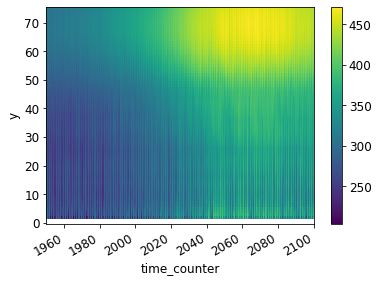

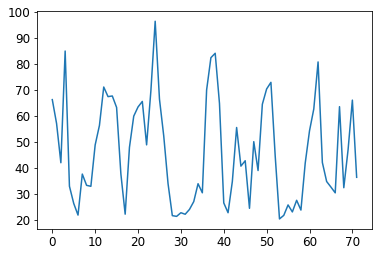

In [19]:
varTOM = 'mldkz5'
TOMvar = tom[varTOM]
TOMvar.isel(y=80,x=50)

tval = TOMvar.isel(y=80,x=50).values
plt.plot(tval)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


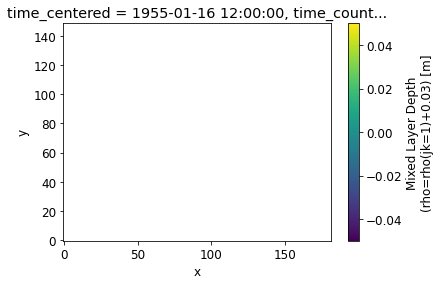

In [10]:
TOMvar

<xarray.DataArray 'somxl030' (time_counter: 72, y: 149, x: 182)>
dask.array<concatenate, shape=(72, 149, 182), dtype=float32, chunksize=(12, 149, 182), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    time_centered  (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) object 1955-01-16 12:00:00 ... 1960-12-16 1...
Dimensions without coordinates: y, x
Attributes:
    standard_name:       MLD030
    long_name:           Mixed Layer Depth (rho=rho(jk=1)+0.03)
    units:               m
    online_operation:    average
    interval_operation:  5760 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 5760 s)